In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/bangalore-housing-prices/BHP.csv


## Importing data

In [3]:
df = pd.read_csv('/kaggle/input/bangalore-housing-prices/BHP.csv')

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Checking Duplicates

In [5]:
df.duplicated().sum()

529

In [6]:
df[df.duplicated()].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0


In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data exploration and cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [10]:
df.isna().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007818
size             0.125088
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

In [11]:
# As society has more than 41% of data missing so we can drop it
df.drop(columns='society',inplace=True)

In [12]:
df.describe().T
#can see bath has some missing values and outliers, which we can deal in later stages.

,count,mean,std,min,25%,50%,75%,max
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


In [13]:
print(df['area_type'].unique())
print(df['availability'].value_counts().head())
df['ready_to_move'] = np.where(df['availability']== 'Ready To Move',1,0)
#most of the values are -ready to move, we can just make it a categorical variable for now, and further can see if its 
#significant or not
df.drop(columns= 'availability',inplace=True)

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
Name: count, dtype: int64


In [14]:
print(df['location'].nunique())
loc_ = df['location'].value_counts() 
loc_50 = loc_[loc_<15]
loc_50
df['location'] = df['location'].apply(lambda x:'other' if x in loc_50 else x)
df['location'].value_counts()

1305


location
other              3571
Whitefield          523
Sarjapur  Road      379
Electronic City     287
Kanakpura Road      249
                   ... 
Varthur Road         15
Benson Town          15
Chamrajpet           15
Nagavarapalya        15
Kodihalli            15
Name: count, Length: 184, dtype: int64

In [15]:
print(df['location'].nunique())
df['location'].fillna('other',inplace=True)

184


In [16]:
print(df['size'].unique())
#as there are some strings in the data so we have to remove it (we can consider bhk=bedroom)

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [17]:
df['size'] = df['size'].str.split().str.get(0)
df['size'] = df['size'].astype(float)

In [18]:
def convrt(a):
    try:
        float(a)
        return True
    except:
        return False

In [19]:
df[df['total_sqft'].apply(convrt) == False].head(20)

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move
30,Super built-up Area,Yelahanka,4.0,2100 - 2850,4.0,0.0,186.000,0
56,Built-up Area,Devanahalli,4.0,3010 - 3410,NaN,NaN,192.000,0
81,Built-up Area,Hennur Road,4.0,2957 - 3450,NaN,NaN,224.500,0
122,Super built-up Area,Hebbal,4.0,3067 - 8156,4.0,0.0,477.000,0
137,Super built-up Area,8th Phase JP Nagar,2.0,1042 - 1105,2.0,0.0,54.005,0
165,Super built-up Area,Sarjapur,2.0,1145 - 1340,2.0,0.0,43.490,0
188,Super built-up Area,KR Puram,2.0,1015 - 1540,2.0,0.0,56.800,1
224,Super built-up Area,Devanahalli,3.0,1520 - 1740,NaN,NaN,74.820,0
410,Super built-up Area,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2.0,1195 - 1440,2.0,0.0,63.770,0


In [20]:
def convert_to_sqft(value):
    try:
        
        value = value.strip()
        
        if '-' in value:
            range_values = value.split('-')
            lower = float(range_values[0].strip())
            upper = float(range_values[1].strip())
            return (lower + upper) / 2
            
        elif 'Sq. Meter' in value:
            sq_meter_value = float(value.split('Sq. Meter')[0])
            return sq_meter_value * 10.7639  # Conversion factor from sq. meters to sq. feet
            
        elif 'Sq. Yards' in value:
            sq_yards_value = float(value.split('Sq. Yards')[0])
            return sq_yards_value * 9
        
        elif 'Acres' in value:
            acres_value = float(value.split('Acres')[0])
            return acres_value * 43560  # Conversion factor from acres to sq. feet
            
        elif 'Cents' in value:
            cents_value = float(value.split('Cents')[0])
            return cents_value * 435.6
            
        elif 'Guntha' in value:
            guntha_value = float(value.split('Guntha')[0])
            return guntha_value * 1089
            
        elif 'Ground' in value:
            ground_value = float(value.split('Ground')[0])
            return ground_value * 2400
            
        elif 'Perch' in value:
            perch_value = float(value.split('Perch')[0])
            return perch_value * 272.25
        

    except ValueError:
        return None  
        
    return value


In [21]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df['total_sqft'] = df['total_sqft'].astype('float').round(2)

### Handling missing data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      12791 non-null  object 
 1   location       12791 non-null  object 
 2   size           12775 non-null  float64
 3   total_sqft     12791 non-null  float64
 4   bath           12718 non-null  float64
 5   balcony        12186 non-null  float64
 6   price          12791 non-null  float64
 7   ready_to_move  12791 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 899.4+ KB


In [23]:
df['size'].value_counts().head(1)

size
2.0    5245
Name: count, dtype: int64

In [24]:
 df['size'] = df['size'].fillna(df['size'].mode()[0])

In [25]:
df['bath'].value_counts().head(1)

bath
2.0    6546
Name: count, dtype: int64

In [26]:
 df['bath'] = df['bath'].fillna(df['bath'].mode()[0])

In [27]:
df['balcony'].value_counts().head(1)

balcony
2.0    4846
Name: count, dtype: int64

In [28]:
 df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

In [29]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,0
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,1
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,1
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,1
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,1


In [30]:
# The minimum size for a 1 BHK flat in urban areas like Mumbai, Delhi, or Bangalore may be around 350-450 sq. ft.
# Anything less tham 300sq. ft. per bhk should be remov 
df = df[~(df['total_sqft']/df['size']<300)]

In [31]:
df.sort_values(by='total_sqft').head()

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move
4853,Carpet Area,Nagarbhavi,1.0,300.0,1.0,1.0,20.0,1
1471,Built-up Area,Kengeri,1.0,340.0,1.0,1.0,10.0,0
3741,Built-up Area,Yelahanka New Town,1.0,350.0,1.0,1.0,13.5,1
2557,Built-up Area,other,1.0,351.0,1.0,1.0,16.0,1
2041,Super built-up Area,Ramamurthy Nagar,1.0,360.0,1.0,1.0,26.0,1


### Outlier treatement

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12053 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      12053 non-null  object 
 1   location       12053 non-null  object 
 2   size           12053 non-null  float64
 3   total_sqft     12053 non-null  float64
 4   bath           12053 non-null  float64
 5   balcony        12053 non-null  float64
 6   price          12053 non-null  float64
 7   ready_to_move  12053 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 847.5+ KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
size,12053.0,2.661578,0.992946,1.00,2.00,3.0,3.0,16.0
total_sqft,12053.0,1995.285621,18159.668166,300.00,1118.00,1308.0,1719.0,1306800.0
bath,12053.0,2.572886,1.093884,1.00,2.00,2.0,3.0,16.0
balcony,12053.0,1.602423,0.801530,0.00,1.00,2.0,2.0,3.0
price,12053.0,113.351754,154.690335,8.44,49.97,70.0,120.0,3600.0
ready_to_move,12053.0,0.785365,0.410586,0.00,1.00,1.0,1.0,1.0


### Box-plots

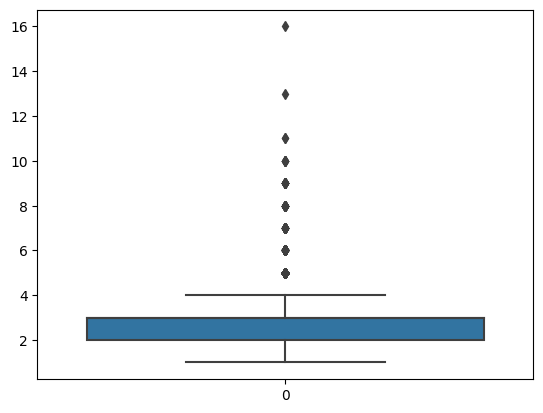

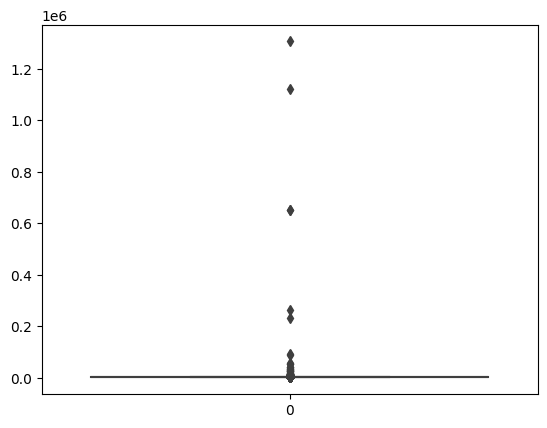

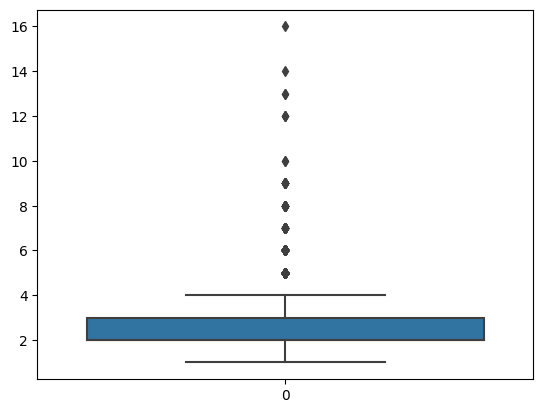

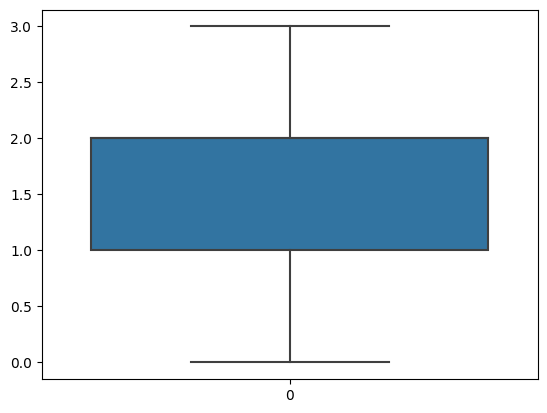

In [34]:
for col in df.columns[2:6]:
    sns.boxplot(df[col])
    plt.show()

In [35]:
df[df['size']>8]

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move
459,Super built-up Area,other,11.0,5000.00,9.0,3.0,360.0,1
538,Super built-up Area,other,9.0,5000.00,9.0,3.0,210.0,1
648,Built-up Area,Arekere,9.0,1123031.25,9.0,2.0,265.0,1
1078,Plot Area,other,9.0,3300.00,14.0,2.0,500.0,1
1299,Plot Area,Chamrajpet,9.0,4050.00,7.0,1.0,1200.0,1
1400,Super built-up Area,Chamrajpet,9.0,7706.95,9.0,1.0,296.0,1
2165,Plot Area,Raja Rajeshwari Nagar,9.0,3125.00,9.0,2.0,350.0,1
2826,Built-up Area,Kadugodi,9.0,6200.00,9.0,0.0,200.0,1
3096,Super built-up Area,other,10.0,12000.00,12.0,2.0,525.0,1
3609,Super built-up Area,other,16.0,10000.00,16.0,2.0,550.0,1


In [36]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.price_per_sqft.describe()

count     12053.000000
mean       6353.246053
std        4227.633744
min           2.257423
25%        4241.935484
50%        5324.675325
75%        6968.992248
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
df.sort_values(by='price_per_sqft',ascending=True).head(100)
#Here for some flat size the tot_sqft is so high which should be treated as outlier

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move,price_per_sqft
1086,Plot Area,other,2.0,1306800.00,2.0,2.0,29.50,0,2.257423
648,Built-up Area,Arekere,9.0,1123031.25,9.0,2.0,265.00,1,23.596850
11615,Plot Area,other,3.0,261360.00,2.0,0.0,80.00,1,30.609122
7607,Plot Area,other,3.0,653400.00,3.0,1.0,217.00,1,33.210897
7001,Plot Area,other,8.0,653400.00,6.0,2.0,290.00,1,44.383226
...,...,...,...,...,...,...,...,...,...
1867,Built-up Area,TC Palaya,4.0,2100.00,2.0,1.0,50.00,1,2380.952381
5374,Super built-up Area,Varthur Road,2.0,805.50,2.0,0.0,19.33,0,2399.751707
7996,Super built-up Area,other,3.0,2500.00,2.0,1.0,60.00,1,2400.000000
2862,Plot Area,Devanahalli,2.0,1950.00,2.0,2.0,46.80,0,2400.000000


In [38]:
# Removing some extreme outliers in the dataset which are giving wrong information about price in terms of price per sq.ft as some are as low
# as Rs.2 per sq. ft. and some are very high which is not possible.
def remove_outliers_quantile(dataframe):
    resDF = pd.DataFrame()
    for i, sdf in df.groupby("location"):
        minQuantile, maxQuantile = sdf.price_per_sqft.quantile([0.15, 0.85])
        tempDF = sdf[(sdf.price_per_sqft > minQuantile) & (sdf.price_per_sqft < maxQuantile)]
        resDF = pd.concat([resDF, tempDF], ignore_index=True)
    return resDF

df1 = remove_outliers_quantile(df)


In [39]:
df1.shape

(8267, 9)

In [40]:
df1.price_per_sqft.describe()

count     8267.000000
mean      5742.639965
std       1934.379489
min       2500.305064
25%       4500.000000
50%       5301.794454
75%       6479.498771
max      20329.358319
Name: price_per_sqft, dtype: float64

In [41]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4.0,2825.0,4.0,3.0,250.0,1,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3.0,1875.0,3.0,1.0,167.0,1,8906.666667
2,Super built-up Area,1st Phase JP Nagar,3.0,2065.0,4.0,1.0,210.0,1,10169.491525
3,Super built-up Area,1st Phase JP Nagar,3.0,2024.0,3.0,2.0,157.0,1,7756.916996
4,Super built-up Area,1st Phase JP Nagar,3.0,2059.0,3.0,2.0,225.0,1,10927.634774


### Correlation matrix

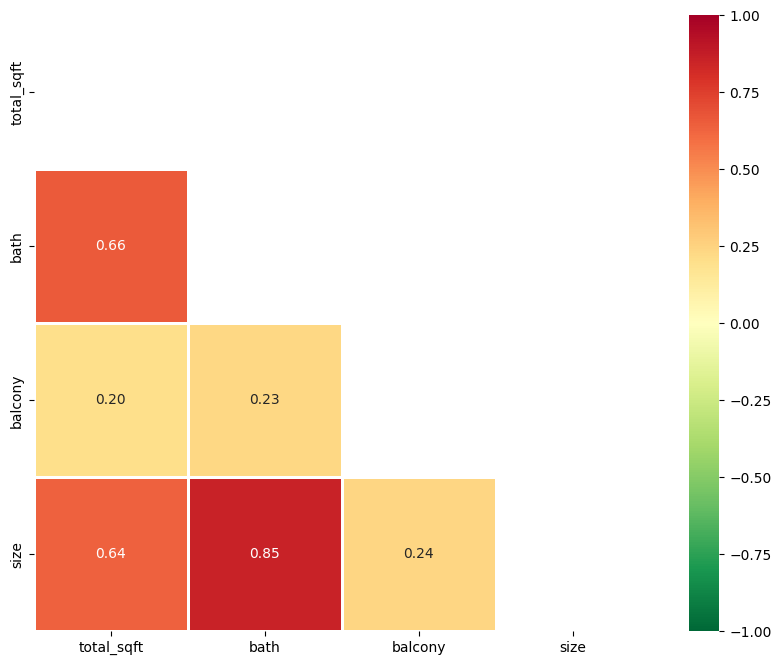

In [42]:
feats = ['total_sqft', 'bath', 'balcony','size']
plt.figure(figsize=(10,8))
sns.heatmap(df1[feats].corr(),
            annot=True ,
            fmt='.2f',
            vmax=1,
            vmin=-1,
            mask=np.triu(df1[feats].corr()),
            linewidths=1,
            linecolor = 'white',
            square=True,
            cmap='RdYlGn_r')

plt.show()


### Encoding

In [43]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    5997
Built-up  Area          1629
Plot  Area               583
Carpet  Area              58
Name: count, dtype: int64

In [44]:
category_mapping = {'Super built-up  Area': 0, 'Built-up  Area': 1, 'Plot  Area': 2, 'Carpet  Area' : 3}
df1['area_type_codes'] = df1['area_type'].map(category_mapping)

In [45]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,ready_to_move,price_per_sqft,area_type_codes
0,Super built-up Area,1st Phase JP Nagar,4.0,2825.0,4.0,3.0,250.0,1,8849.557522,0
1,Super built-up Area,1st Phase JP Nagar,3.0,1875.0,3.0,1.0,167.0,1,8906.666667,0
2,Super built-up Area,1st Phase JP Nagar,3.0,2065.0,4.0,1.0,210.0,1,10169.491525,0
3,Super built-up Area,1st Phase JP Nagar,3.0,2024.0,3.0,2.0,157.0,1,7756.916996,0
4,Super built-up Area,1st Phase JP Nagar,3.0,2059.0,3.0,2.0,225.0,1,10927.634774,0


In [46]:
df1.drop(['area_type'],axis=1,inplace=True)


In [47]:
df1.rename(columns={'area_type_codes': 'area_type'},inplace=True)

In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_array = ohe.fit_transform(df1[['location']])
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['location']))

In [49]:
df1.drop('price_per_sqft',axis=1,inplace=True)

In [50]:
df1 = pd.concat([df1.drop(columns=['location'],axis=1), encoded_df], axis=1)

In [51]:
df1.head()

,size,total_sqft,bath,balcony,price,ready_to_move,area_type,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,...,location_Varthur Road,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,4.0,2825.0,4.0,3.0,250.0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1875.0,3.0,1.0,167.0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2065.0,4.0,1.0,210.0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2024.0,3.0,2.0,157.0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2059.0,3.0,2.0,225.0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling

In [52]:
x = df1.drop(columns=['price'])
y = df1['price']

In [53]:
x.head()

,size,total_sqft,bath,balcony,ready_to_move,area_type,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Varthur Road,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,4.0,2825.0,4.0,3.0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1875.0,3.0,1.0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2065.0,4.0,1.0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2024.0,3.0,2.0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2059.0,3.0,2.0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
x_train.head()

,size,total_sqft,bath,balcony,ready_to_move,area_type,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Varthur Road,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
7220,2.0,1333.0,2.0,2.0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4013,4.0,3356.0,4.0,2.0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5100,3.0,1702.0,3.0,2.0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,2.0,1140.0,2.0,2.0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7134,2.0,1290.0,1.0,0.0,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
columns_to_scale = ['size','total_sqft','bath','balcony','area_type']
x_scaled_array = mms.fit_transform(x_train[columns_to_scale])

In [57]:
x_test_array = mms.transform(x_test[columns_to_scale])

In [58]:
x_train[columns_to_scale] = pd.DataFrame(x_scaled_array, index=x_train.index)
x_train.head()

,size,total_sqft,bath,balcony,ready_to_move,area_type,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Varthur Road,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
7220,0.066667,0.034319,0.066667,0.666667,1,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4013,0.200000,0.101528,0.200000,0.666667,0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5100,0.133333,0.046578,0.133333,0.666667,1,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,0.066667,0.027907,0.066667,0.666667,1,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7134,0.066667,0.032890,0.000000,0.000000,1,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
x_test[columns_to_scale] = pd.DataFrame(x_test_array, index=x_test.index)

## RFE(Feature Selection Technique)

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select=95)
rfe.fit(x_train,y_train)



RFE(estimator=LinearRegression(), n_features_to_select=95)

## Linear Regression and VIF

In [61]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [62]:
# Function for building statsmodel
def model(feats):
    x_train_stat = sm.add_constant(x_train[feats])
    x_test_stat = sm.add_constant(x_test[feats])
    lin_reg = sm.OLS(y_train, x_train_stat).fit()
    print(lin_reg.summary())
    print('\n')
    y_pred_lr = lin_reg.predict(x_test_stat)
    print(f'R squared of test data = {r2_score(y_test,y_pred_lr)}') 
    print('\n')
    insignificant_vars = lin_reg.pvalues[lin_reg.pvalues > 0.05].index.tolist()
    return lin_reg, insignificant_vars

# Function to compute VIFs
def vif_mod(feats):
    data1 = x_train[feats]
    vif = pd.DataFrame()
    vif['Columns'] = data1.columns
    vif['VIF'] = [variance_inflation_factor(data1.values, i) for i in range(data1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [63]:
# variable based on RFE
sup_cols = x_train.columns[rfe.support_]

# x_train data frame with selected cols
x_train_rfe =  x_train[sup_cols]
x_test_rfe = x_test[sup_cols]


In [64]:
feats = list(x_train_rfe.columns)
model_result, insignificant_features = model(feats)
print("Insignificant Variables:", insignificant_features)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     421.0
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:42:39   Log-Likelihood:                -27472.
No. Observations:                5786   AIC:                         5.514e+04
Df Residuals:                    5690   BIC:                         5.578e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [65]:
feats = [cols for cols in x_train_rfe.columns if cols not in ['size']]
model_result, insignificant_features = model(feats)
print("Insignificant Variables:", insignificant_features)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     424.2
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:42:49   Log-Likelihood:                -27480.
No. Observations:                5786   AIC:                         5.515e+04
Df Residuals:                    5691   BIC:                         5.578e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [66]:
feats = [cols for cols in feats if cols not in insignificant_features]
model_result, insignificant_features = model(feats)
print("Insignificant Variables:", insignificant_features)
vif_mod(feats)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     496.0
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:42:58   Log-Likelihood:                -27499.
No. Observations:                5786   AIC:                         5.516e+04
Df Residuals:                    5705   BIC:                         5.570e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [67]:
'''
There are no insignificant features as p value of all features are equal to or less than 0.05 and 
also the vif of all features are less than 5, so now we will remove the features which has p value 
of greater than 0.005 and will see if there is any significant impact in the value of r-squared.
This is mainly done to decrease the number of features.
'''

'\nThere are no insignificant features as p value of all features are equal to or less than 0.05 and \nalso the vif of all features are less than 5, so now we will remove the features which has p value \nof greater than 0.005 and will see if there is any significant impact in the value of r-squared.\nThis is mainly done to decrease the number of features.\n'

In [68]:
def updatedmodel(feats):
    x_train_stat = sm.add_constant(x_train[feats])
    lin_reg = sm.OLS(y_train, x_train_stat).fit()
    insignificant_vars = lin_reg.pvalues[lin_reg.pvalues >= 0.005].index.tolist()
    return lin_reg, insignificant_vars

In [69]:
model_result, insignificant_features = updatedmodel(feats)
print("Insignificant Variables:", insignificant_features)

Insignificant Variables: ['location_6th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambedkar Nagar', 'location_Ananth Nagar', 'location_Anekal', 'location_Attibele', 'location_Babusapalaya', 'location_Banashankari Stage VI', 'location_Bannerghatta', 'location_Bisuvanahalli', 'location_Bommanahalli', 'location_Bommasandra', 'location_Doddathoguru', 'location_Gubbalala', 'location_Gunjur', 'location_HRBR Layout', 'location_Hegde Nagar', 'location_Hennur', 'location_Horamavu Agara', 'location_Horamavu Banaswadi', 'location_Hormavu', 'location_Hoskote', 'location_Kammasandra', 'location_Kengeri', 'location_Kengeri Satellite Town', 'location_Kodichikkanahalli', 'location_Kothannur', 'location_Lakshminarayana Pura', 'location_Pai Layout', 'location_Rayasandra', 'location_Sanjay nagar', 'location_Varthur', 'location_Vijayanagar']


In [70]:
feats = [cols for cols in feats if cols not in insignificant_features]
model_result, insignificant_features = model(feats)
vif_mod(feats)
print('\n\n')
print(f'Length of features {feats} is : {len(feats)}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     872.8
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:43:04   Log-Likelihood:                -27597.
No. Observations:                5786   AIC:                         5.528e+04
Df Residuals:                    5741   BIC:                         5.558e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## PCA (Principle Component Analysis)

In [71]:
'''
In regression we are using pca for eliminating the features instead of using the feats 
(on basis of vif and pvalue-->only for regression).
'''

'\nIn regression we are using pca for eliminating the features instead of using the feats \n(on basis of vif and pvalue-->only for regression).\n'

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.80, random_state=42)
x_train_pca = pca.fit_transform(x_train_rfe)
x_test_pca = pca.transform(x_test_rfe)

In [73]:
print(sum(pca.explained_variance_ratio_))

0.8043893502071094


In [74]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35',
       'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41', 'pca42',
       'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49',
       'pca50', 'pca51'], dtype=object)

## Random Forest Regressor

In [75]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [76]:
rf=RandomForestRegressor()

In [77]:
 from sklearn.model_selection import GridSearchCV

In [78]:
np.random.seed(40)

param_dist = {'n_estimators': [100,200],
             'max_depth': [3,5,7],
             'max_features': ['sqrt', 'log2'],
             'criterion': ['squared_error']}

cv_rf = GridSearchCV(rf,cv=3,param_grid=param_dist,n_jobs=-1)
cv_rf.fit(x_train_pca,y_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


In [79]:
y_pred_train = cv_rf.predict(x_train_pca)
y_pred_test= cv_rf.predict(x_test_pca)

In [80]:
print("training accuracy", r2_score(y_train, y_pred_train))
print()
print("test accuracy", r2_score(y_test, y_pred_test))

training accuracy 0.8832117930552257

test accuracy 0.7852870123339672


## XGBoost Regressor

In [81]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42,learning_rate=0.01,max_depth=7)
xgb.fit(x_train_pca,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [82]:
y_pred_train = xgb.predict(x_train_pca) 
y_pred_test = xgb.predict(x_test_pca) 

In [83]:
print("training accuracy", r2_score(y_train, y_pred_train))
print()
print("test accuracy", r2_score(y_test, y_pred_test))

training accuracy 0.7407424893538991

test accuracy 0.6463050769039811


GOT 87% ACCURACY FOR TRAIN AND APPROX 83% FOR TEST DATA USING LINEAR REGRESSION ALGORITHM